# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


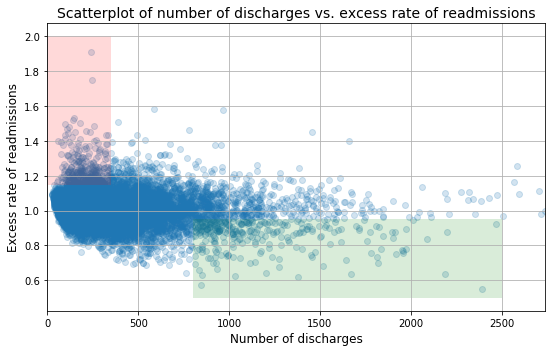

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])


ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [ ]:
# Your turn

A) I no not agree with the above analysis until more statistical research is done. In addition, the policy statement draws conclusions based off of one hypothesis and does not take in to consideration any other factors that could lead to higher readmission rates. Finally, the policy assumes that higher readmission rates are caused by poorer care and that people would be better off having to travel further for better care compared to traveling a shorter distance for average care. 

B) 
H0: Readmission rates are not impacted by the size or capacity of a hospital.
H1: Readmission rates are impacted by the size and capacity of a hospital.

In [10]:
df = clean_hospital_read_df

In [13]:
len(df)

11578

In [15]:
df = df[['Number of Discharges', 'Excess Readmission Ratio']]

In [20]:
df = df.dropna()

In [34]:
df_mean = df.mean()
df_std = df.std()

In [23]:
df_small = df[df['Number of Discharges'] < 100]
df_large = df[df['Number of Discharges'] > 1000]

In [28]:
small_mean = np.mean(df_small['Excess Readmission Ratio'])
small_len = len(small_mean)

In [29]:
large_mean = np.mean(df_large['Excess Readmission Ratio'])
large_len = len(large_mean)

In [25]:
# P-test - independent t-test to compare two sets of data
from scipy import stats
stats.ttest_ind(df_small, df_large)

Ttest_indResult(statistic=array([-98.12646742,  10.0606204 ]), pvalue=array([  0.00000000e+00,   3.77875392e-23]))

In [35]:
# CI of 99%
stats.norm.interval(0.99, loc=df_mean, scale=df_std)

(array([-429.83291231,    0.77061953]),
 array([ 1160.76532946,     1.24438803]))

An alpha at 0.01, or aa 99% confidence interval is anything greater thatn 1160 or less than 1.24. The p-value does fall in the critical area, so significance is found and the null hypothesis is rejected.

I do believe that the practical and statistical significance do differ here. even though there is statistically significant results, I am not convinced that it is practical to take such a large policy. Experiments on a smaller scale should be conducted and other variables need to be considered.

The scatter plot above fails to give any sort of linear trend that shows readmission rates actually rise with lower hospital capacity. The ink to data ratio is extremely high and the two boxes fail to show any useful information.

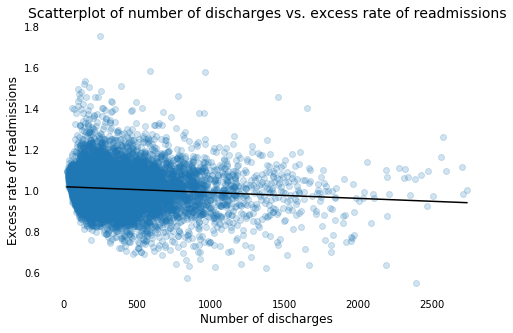

In [75]:
df = df[df['Number of Discharges'] < 3000]
df = df[df['Excess Readmission Ratio'] < 1.8]
x, y = df['Number of Discharges'], df['Excess Readmission Ratio']
fig, ax = plt.subplots(figsize=(8,5))
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis=u'both', which=u'both',length=0)
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)
plt.plot(x, line, 'black')
plt.scatter(x, y, alpha=0.2)